<a href="https://colab.research.google.com/github/GauraoM/PyTorch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='sample_data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='sample_data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7EFC10F0E5D0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


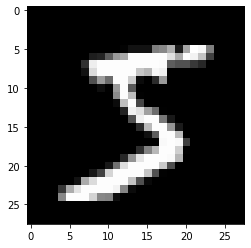

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


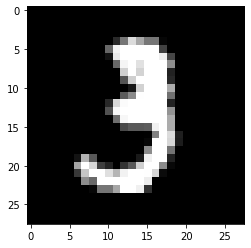

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels) converting to tensor

dataset = MNIST(root='sample_data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


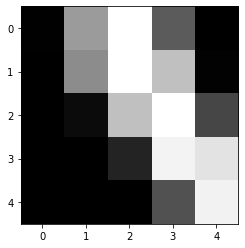

In [13]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

#### Traing and Validation datset

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
# Importing Linear model
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0232,  0.0049,  0.0230,  ..., -0.0257,  0.0090,  0.0190],
        [-0.0095,  0.0296, -0.0166,  ...,  0.0188, -0.0151, -0.0038],
        [ 0.0133,  0.0265,  0.0009,  ...,  0.0170,  0.0042, -0.0146],
        ...,
        [-0.0061, -0.0179,  0.0314,  ...,  0.0078,  0.0176,  0.0262],
        [ 0.0001,  0.0314,  0.0032,  ...,  0.0131,  0.0205,  0.0180],
        [ 0.0240,  0.0312,  0.0348,  ...,  0.0225,  0.0236, -0.0196]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0336,  0.0097,  0.0253, -0.0107, -0.0056, -0.0123, -0.0068, -0.0325,
        -0.0297, -0.0015], requires_grad=True)

In [19]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([9, 3, 2, 8, 9, 0, 9, 4, 2, 9, 8, 1, 9, 4, 8, 5, 6, 3, 4, 8, 3, 3, 8, 4,
        1, 5, 8, 2, 2, 2, 0, 2, 4, 9, 2, 1, 6, 7, 3, 9, 5, 4, 9, 8, 6, 9, 2, 7,
        4, 9, 3, 8, 5, 8, 8, 2, 2, 4, 8, 6, 7, 1, 8, 1, 9, 0, 3, 2, 4, 1, 4, 9,
        5, 4, 4, 4, 0, 3, 2, 3, 9, 8, 1, 3, 7, 0, 3, 9, 1, 0, 8, 6, 8, 9, 4, 2,
        6, 6, 4, 5, 1, 9, 8, 3, 9, 6, 3, 9, 0, 2, 7, 0, 1, 3, 0, 7, 8, 6, 4, 4,
        7, 4, 5, 8, 7, 9, 1, 8])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [20]:
images.shape

torch.Size([128, 1, 28, 28])

In [21]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()    


In [23]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [24]:
# printing weights
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0236, -0.0280,  0.0154,  ..., -0.0113, -0.0298, -0.0063],
         [-0.0091,  0.0271, -0.0016,  ...,  0.0192,  0.0217,  0.0234],
         [ 0.0202, -0.0192,  0.0070,  ...,  0.0351, -0.0210,  0.0191],
         ...,
         [ 0.0044, -0.0067,  0.0239,  ..., -0.0276,  0.0220, -0.0111],
         [-0.0113,  0.0021,  0.0015,  ..., -0.0303, -0.0101, -0.0050],
         [ 0.0172,  0.0048, -0.0110,  ..., -0.0092,  0.0325, -0.0235]],
        requires_grad=True), Parameter containing:
 tensor([-0.0018,  0.0091, -0.0192,  0.0009, -0.0292, -0.0071,  0.0345,  0.0080,
         -0.0049, -0.0295], requires_grad=True)]

In [25]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1515,  0.5093, -0.3062, -0.1033,  0.0176, -0.0983, -0.2558,  0.2681,
          0.1249, -0.1062],
        [ 0.1419,  0.3358,  0.1863,  0.1538,  0.0747, -0.0388,  0.0812,  0.1280,
          0.1906, -0.1197]])


In [26]:
import torch.nn.functional as F

In [27]:
outputs[:2]

tensor([[ 0.1515,  0.5093, -0.3062, -0.1033,  0.0176, -0.0983, -0.2558,  0.2681,
          0.1249, -0.1062],
        [ 0.1419,  0.3358,  0.1863,  0.1538,  0.0747, -0.0388,  0.0812,  0.1280,
          0.1906, -0.1197]], grad_fn=<SliceBackward0>)

In [28]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1108, 0.1584, 0.0701, 0.0859, 0.0969, 0.0863, 0.0737, 0.1245, 0.1079,
         0.0856],
        [0.1022, 0.1240, 0.1068, 0.1034, 0.0955, 0.0853, 0.0961, 0.1008, 0.1073,
         0.0787]])
Sum:  0.9999999403953552


In [29]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 1, 1, 1, 8, 1, 1, 1, 1, 3, 8, 1, 8, 1, 7, 8, 8, 0, 1, 5, 7, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 8, 1, 7, 8, 1, 1, 1, 1, 0, 1, 3, 1, 7, 0, 1, 1, 8,
        1, 7, 0, 7, 8, 1, 1, 1, 0, 1, 7, 1, 8, 1, 1, 1, 1, 1, 1, 1, 7, 8, 1, 1,
        1, 8, 8, 8, 8, 1, 8, 8, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 8, 1,
        0, 0, 1, 1, 8, 7, 1, 0, 1, 1, 1, 1, 1, 7, 0, 0, 8, 1, 8, 1, 8, 1, 1, 1,
        1, 5, 1, 1, 1, 7, 1, 1])
tensor([0.1584, 0.1240, 0.1560, 0.1699, 0.1543, 0.1479, 0.1538, 0.1413, 0.1186,
        0.1139, 0.1376, 0.1337, 0.1547, 0.1588, 0.1712, 0.1323, 0.1405, 0.1499,
        0.1309, 0.1441, 0.1448, 0.1700, 0.1232, 0.1381, 0.1296, 0.1419, 0.1472,
        0.1796, 0.1695, 0.1259, 0.1512, 0.1357, 0.1308, 0.1332, 0.1506, 0.1253,
        0.1541, 0.1427, 0.1695, 0.1343, 0.1634, 0.1150, 0.1528, 0.1489, 0.1259,
        0.1975, 0.1495, 0.1286, 0.1315, 0.1301, 0.1264, 0.1242, 0.1313, 0.1499,
        0.1553, 0.1489, 0.1657, 0.1375, 0.1452, 0.1212, 0.1491, 0.1347, 0.1224,
       

In [30]:
torch.sum(preds == labels)

tensor(16)

#### Evaluation Metric and Loss function

In [31]:
# Get the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [32]:
accuracy(outputs, labels)

tensor(0.1250)

In [33]:
probs

tensor([[0.1108, 0.1584, 0.0701,  ..., 0.1245, 0.1079, 0.0856],
        [0.1022, 0.1240, 0.1068,  ..., 0.1008, 0.1073, 0.0787],
        [0.1225, 0.1560, 0.0810,  ..., 0.1179, 0.1223, 0.0789],
        ...,
        [0.1034, 0.1226, 0.1113,  ..., 0.1518, 0.1247, 0.0825],
        [0.0934, 0.1403, 0.1087,  ..., 0.1295, 0.1263, 0.0687],
        [0.1203, 0.1335, 0.0863,  ..., 0.1171, 0.1041, 0.0680]],
       grad_fn=<SoftmaxBackward0>)

In [34]:
# Calculate the loss using cross-entropy
loss_fn = F.cross_entropy

In [35]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3419, grad_fn=<NllLossBackward0>)


#### Optimizers

In [36]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [37]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [38]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [39]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.12282436341047287, 'val_loss': 2.2877297401428223}

In [40]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9266, val_acc: 0.6330
Epoch [1], val_loss: 1.6634, val_acc: 0.7276
Epoch [2], val_loss: 1.4669, val_acc: 0.7666
Epoch [3], val_loss: 1.3184, val_acc: 0.7883
Epoch [4], val_loss: 1.2041, val_acc: 0.7991


In [41]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1142, val_acc: 0.8080
Epoch [1], val_loss: 1.0419, val_acc: 0.8134
Epoch [2], val_loss: 0.9829, val_acc: 0.8191
Epoch [3], val_loss: 0.9336, val_acc: 0.8219
Epoch [4], val_loss: 0.8920, val_acc: 0.8253


In [42]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8563, val_acc: 0.8288
Epoch [1], val_loss: 0.8254, val_acc: 0.8324
Epoch [2], val_loss: 0.7983, val_acc: 0.8346
Epoch [3], val_loss: 0.7744, val_acc: 0.8372
Epoch [4], val_loss: 0.7530, val_acc: 0.8395
